In [1]:
import os
import sys 
os.chdir("/workspaces/dev/modules")
sys.path.append("/workspaces/dev/models/R-CNN")
os.environ["TF_XLA_FLAGS"] = "--tf_xla_auto_jit=2 --tf_xla_cpu_global_jit=false"
os.environ["XLA_FLAGS"] = "--xla_cpu_multi_thread_eigen=false intra_op_parallelism_threads=1 inter_op_parallelism_threads=1"

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2

2025-03-16 19:20:11.164164: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-16 19:20:11.178092: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742152811.191950   51220 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742152811.196914   51220 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-16 19:20:11.211377: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
from Pills.GenerativeSequence import GenerativeSequence
from PillNetRoI import PillNetRoI

In [4]:
SOURCE_PATH = '/workspaces/dev/datasets/pills/data'
LABEL_PATH = '/workspaces/dev/datasets/pills/class_label.csv'
BACKGROUND_IMAGEES_PATH = '/workspaces/dev/data'

In [5]:
TRAIN_DATA_SIZE = 100000
BATCH_SIZE = 1
INPUT_SIZE = (256, 256, 3)

In [6]:
def visualize(views):
  height = len(views)
  width = len(views[0])
  fig, axes = plt.subplots(height, width, figsize=(width*5, height*5), squeeze=False)

  for row, view in enumerate(views):
    for col, (img, title) in enumerate(view):
      axes[row][col].imshow(img)
      axes[row][col].set_title(title)
      axes[row][col].axis('off')

  plt.show()

In [10]:
model = keras.models.load_model("/workspaces/dev/models/R-CNN/checkpoints/PillNetRoI_sub_2025_03_16_sub.keras", custom_objects={'PillNetRoI': PillNetRoI})
model.compile(jit_compile=False, update=False)

I0000 00:00:1742152889.935975   51220 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 12745 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080, pci bus id: 0000:01:00.0, compute capability: 8.9
/usr/local/lib/python3.10/dist-packages/keras/src/saving/serialization_lib.py:730: UserWarning: Model 'pill_net_ro_i' had a build config, but the model cannot be built automatically in `build_from_config(config)`. You should implement `def build_from_config(self, config)`, and you might also want to implement the method  that generates the config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the model (i.e. its variables) upon deserialization.
  instance.build_from_config(build_config)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/serialization_lib.py:734: UserWarning: `compile()` was not called as part of model loading because the model's `compile()` method is custom. All subcla

In [11]:
generative_sequence = GenerativeSequence(
  TRAIN_DATA_SIZE, BATCH_SIZE, input_size=INPUT_SIZE[:2], material_path=SOURCE_PATH, label_path=LABEL_PATH,
  background_images_path=BACKGROUND_IMAGEES_PATH, use_multiprocessing=True, workers=12)

In [12]:
idx = 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


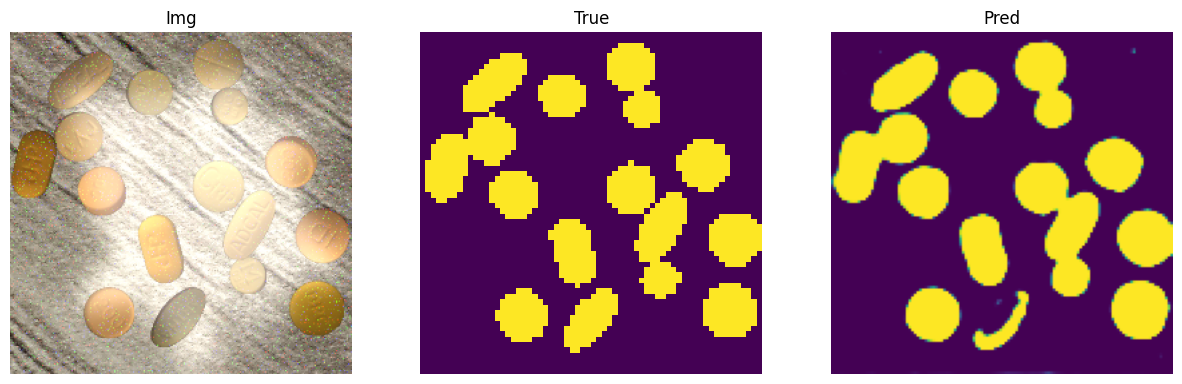

In [51]:
X, Y = generative_sequence[idx]
y_pred = model.predict(X)

idx += 1

views = []
for img, y_true, y_pred in zip(X, Y['roi'], y_pred['roi']):
  # y_pred[y_pred < 0.5] = 0
  views.append([(img, f"Img"), (y_true, f"True"), (y_pred, f"Pred")])

visualize(views)